# ICOS Labelling plots
Generates plots for use in ICOS Labelling reports.

## Initial Setup
Instructions for setting up in a virtual environment (venv). To be run from the folder containing the notebooks.

1. `python -m venv .venv`
2. `source .venv/bin/activate`
3. `pip install pandas matplotlib jupyter ipykernel`
4. `python -m ipykernel install --user --name=.venv`
5. `jupyter notebook`

Open this notebook and make sure it is running using the `.venv` kernel.


## Subsequent Usage
The initial setup above only needs performing once. After that, you need only run:

1. `source .venv/bin/activate`
2. `jupyter notebook`

## Files
The notebook expects two folders: `input` and `output`.

The `input` folder should contain a subfolder for a station, and within that the uncompressed data from a QuinCe export containing at least the "ICOS OTC Labelling" format file.

The `output` folder can be empty; the notebook will take care of creating the necessary folder structure inside it.

## Notebook Initialisation
The cell below will initialise the notebook ready for use

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import os

## Data Setup
Fill in the variables below to match the details of the data to be processed.

| Variable            | Meaning       |
| ------------------- | ------------- |
| `station_name`      | The name of the station. There should be a folder with the same name in the `input` folder. |
| `dataset`           | The name of the dataset exported from QuinCe. This should be the name of the unzipped export from QuinCe within the folder named after the station name. |


In [57]:
station_name = 'Sea Cargo Express'
dataset = 'MLSC20231209'

## General Setup

In [58]:
# Create output folder
output_folder = f'output/{station_name}/{dataset}'
os.makedirs(output_folder, exist_ok=True)

## Load data and set up
Load the data file and perform required pre-preprocessing.

If there is known invalid data in the dataframe, it must be removed here.

In [92]:
datapath=f'input/{station_name}/{dataset}/dataset/ICOS OTC Labelling/{dataset}.csv'
df=pd.read_csv(datapath)

# Remove invalid data
df = df[df[water_flow_column] < 100]

# Reset dataset indices
df = df.reindex()

# Extract timestamps
dt=pd.to_datetime(df['Date/Time'])

# Default x axis (time)
x = dt

/var/folders/by/031bd4vd359bypqjr0xl59j40000gn/T/ipykernel_76956/4051202282.py:2: DtypeWarning: Columns (3,7,15,19,23,27,31,32,39,55,58,61,67,70,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(datapath)


## Water Flow

Set `water_flow_column` to the correct column name.

Set `min_water_flow` to set the threshold for highlighting low/no water flow.

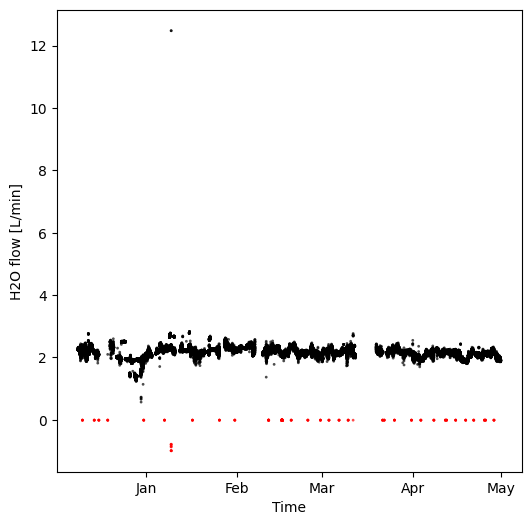

In [89]:
# The water flow column
water_flow_column = 'H2O flow'

# Set the minimum water flow. Values below this will be highlighted.
min_water_flow = 0.1


# Extract the water flow and detect low flow value
water_flow = df[water_flow_column].values
condition = water_flow < min_water_flow

# Start figure
plt.figure(figsize=(6, 6))

# Scatter plot for points with low water flow (red)
plt.scatter(x[condition], water_flow[condition], marker='o', s=1, edgecolor='red',facecolors='none', label='Low', alpha=0.7)

# Scatter plot for points with normal water flow (black)
plt.scatter(x[~condition], water_flow[~condition], marker='o',s=1, edgecolor='black',facecolors='none', label='Normal', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))


# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('H2O flow [L/min]')

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/8.Eq_Pump_measured_plot_own_range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

# Equilibrator Pressure

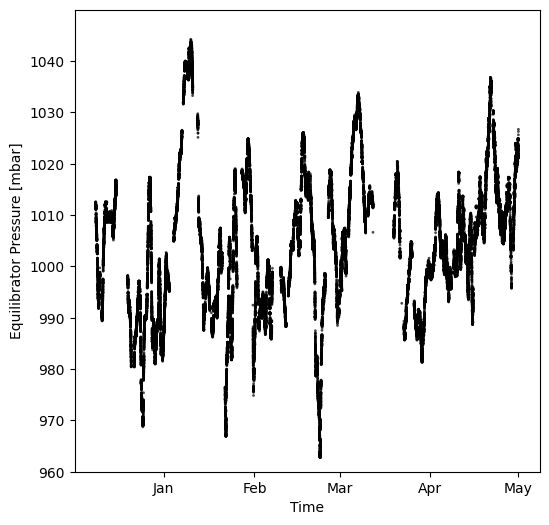

In [90]:
y_min = 960
y_max = 1050


y = df['Pressure in Equilibrator'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

plt.scatter(x, y, s=1, marker='o', edgecolor='k',facecolors='none', alpha=0.7)  # 'o' marker, blue color, transparency

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set y-axis tick positions and labels from 0 to 120
plt.yticks(np.arange(y_min, y_max, step=10))  # Adjust the step value as needed
plt.ylim(y_min, y_max)

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Equilibrator Pressure [mbar]')

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/4.Equil_Pressplot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## Water fCO2

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
/var/folders/by/031bd4vd359bypqjr0xl59j40000gn/T/ipykernel_76956/1575952238.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('fCO$_2$ [$\mu$atm]')


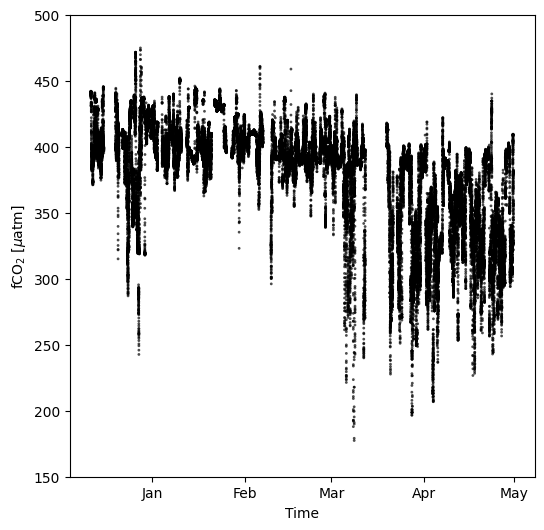

In [91]:
y_min = 150
y_max = 500


y = df['fCO2 [uatm]'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show Good values
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))



# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('fCO$_2$ [$\mu$atm]')
plt.ylim(y_min, y_max)

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = f'{output_folder}/9.fCO2_own-range.png'


# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## xCO2 vs fCO2

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/var/folders/by/031bd4vd359bypqjr0xl59j40000gn/T/ipykernel_76956/180742861.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('fCO$_2$ [$\mu$atm]')


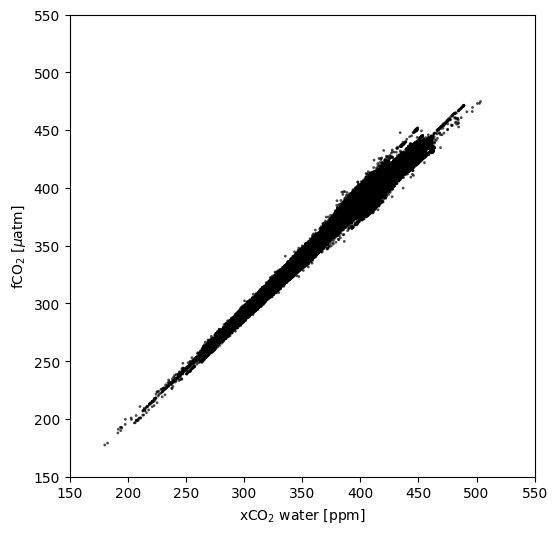

In [78]:
x_min = 150
x_max = 550
y_min = 150
y_max = 550

x = df['CO2 um/m'].values
y = df['fCO2 [uatm]'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Add labels to the x and y axes
plt.xlabel('xCO$_2$ water [ppm]')
plt.ylabel('fCO$_2$ [$\mu$atm]')

plt.xlim(x_min, y_max)
plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/10.fCO2_vs_xCO2_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## xCO2

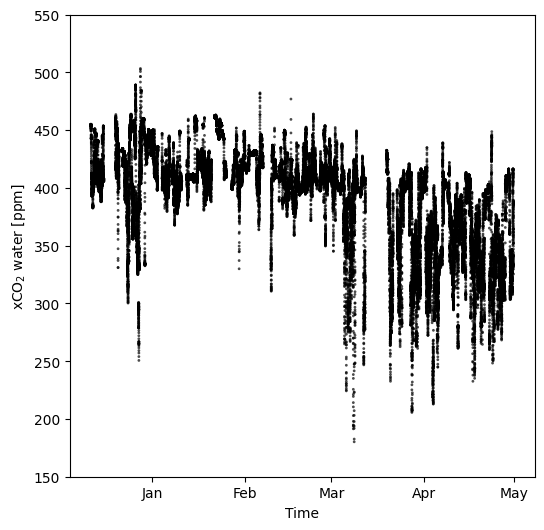

In [82]:
y_min = 150
y_max = 550

x = dt
y = df['CO2 um/m'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show good values
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('xCO$_2$ water [ppm]')

plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/5.CO2_measured_plot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

## Equilibrator Temperature

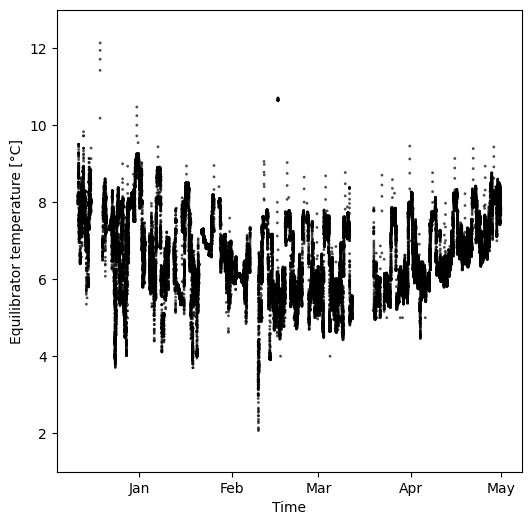

In [87]:
y_min = 1
y_max = 13

x = dt
y = df['TempEqu'].values

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

# Only show good values
condition = df['TempEqu QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Equilibrator temperature [°C]')
plt.ylim(y_min, y_max)

# Specify the file path and name
output_path = f'{output_folder}/2.Equil_temp_plot_own-range.png'

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()